_________________________________________________________________________

# **Data Scientist Test Task [v2.0] inPowered** 


Optimizing CPE across groups <br> <br>


Rafael Henrique Martello

_________________________________________________________________________

# [01] EXPLORATORY DATA ANALYSIS

## Libraries

In [46]:
# Data handling
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder


## Load Data

In [3]:
# Carregando dados:

df = pd.read_csv('Data/problem_merged_data.csv')

In [4]:
df.shape

(1682, 24)

In [5]:
df.head(5)

,group,item,channel,date,bid,budget,engagements,page_views,clicks,active_days,...,storySummary,IABCategory,targetGeo,targetInterest,targetAge,targetOs,targetDevices,targetGender,targetLanguages,CATEGORY_1
0,37,997,YAHOO,2021-12-21,0.263696,660.923913,138,388,411,4,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,1372,YAHOO,2021-12-21,0.263043,235.217391,80,253,270,4,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,1372,YAHOO,2021-12-22,0.366809,1060.638298,251,856,905,5,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,997,YAHOO,2021-12-22,0.367447,2317.021277,219,687,723,5,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,997,YAHOO,2021-12-23,0.419130,2600.000000,201,682,722,6,...,Peace of Mind with AAA Roadside Service. Join ...,Travel,"{""channelId"":""YAHOO"",""channelName"":""Yahoo"",""re...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Checks

### 1 - Check Dtypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group            1682 non-null   int64  
 1   item             1682 non-null   int64  
 2   channel          1682 non-null   object 
 3   date             1682 non-null   object 
 4   bid              1682 non-null   float64
 5   budget           1682 non-null   float64
 6   engagements      1682 non-null   int64  
 7   page_views       1682 non-null   int64  
 8   clicks           1682 non-null   int64  
 9   active_days      1682 non-null   int64  
 10  media_spend      1682 non-null   float64
 11  media_cpc        1682 non-null   float64
 12  cpe              1682 non-null   float64
 13  headline         1682 non-null   object 
 14  storySummary     1682 non-null   object 
 15  IABCategory      1682 non-null   object 
 16  targetGeo        1682 non-null   object 
 17  targetInterest

### 2 - Check duplicity

In [6]:
df.duplicated().sum()

0

### 3 - Check unique values by variable

In [120]:
def _Unique_values(df):
    '''
    Function to check for unique values

    Input -> df: DataFrame to be analyzed
    Output -> return dataset with unique values by variable
    '''
    list_var = []
    list_value = []
    unique_df = pd.DataFrame()

    for i in df.columns:
        list_var.append(i)
        list_value.append(len(list(set(df[i]))))
    
    unique_df['var'] = list_var
    unique_df['unique'] = list_value
        
    return unique_df

unique_df = _Unique_values(df)
display(unique_df)

,var,unique
0,group,10
1,item,157
2,channel,3
3,date,358
4,bid,762
5,budget,1014
6,engagements,196
7,page_views,354
8,clicks,342
9,active_days,194


### 4 - Check Null Values

In [121]:
def _Null_values(df):
    '''
    Function to check for nulls in the dataset

    Input -> df: DataFrame to be analyzed
    Output -> dataset: table with columns that contain nulls
    '''
    lista_null=[]
    for col in df.columns:
        if df[col].isna().sum()>0:
            lista_null.append([col, df[col].isna().sum(),round(100*df[col].isna().sum()/df[col].shape[0],2)])
    
    return pd.DataFrame(lista_null, columns=['Col', 'Rows', '%'])

_Null_values(df)

,Col,Rows,%
0,targetInterest,979,58.20
1,targetAge,1024,60.88
2,targetOs,1024,60.88
3,targetDevices,1024,60.88
4,targetGender,1024,60.88
5,targetLanguages,1024,60.88
6,CATEGORY_1,640,38.05


In [139]:
df = df.fillna(value="unknown")

# Exploratory Data Analysis

In [140]:
boxplot_vars = list(unique_df[unique_df.unique<=10]['var'])

### 1 - Comparative Charts

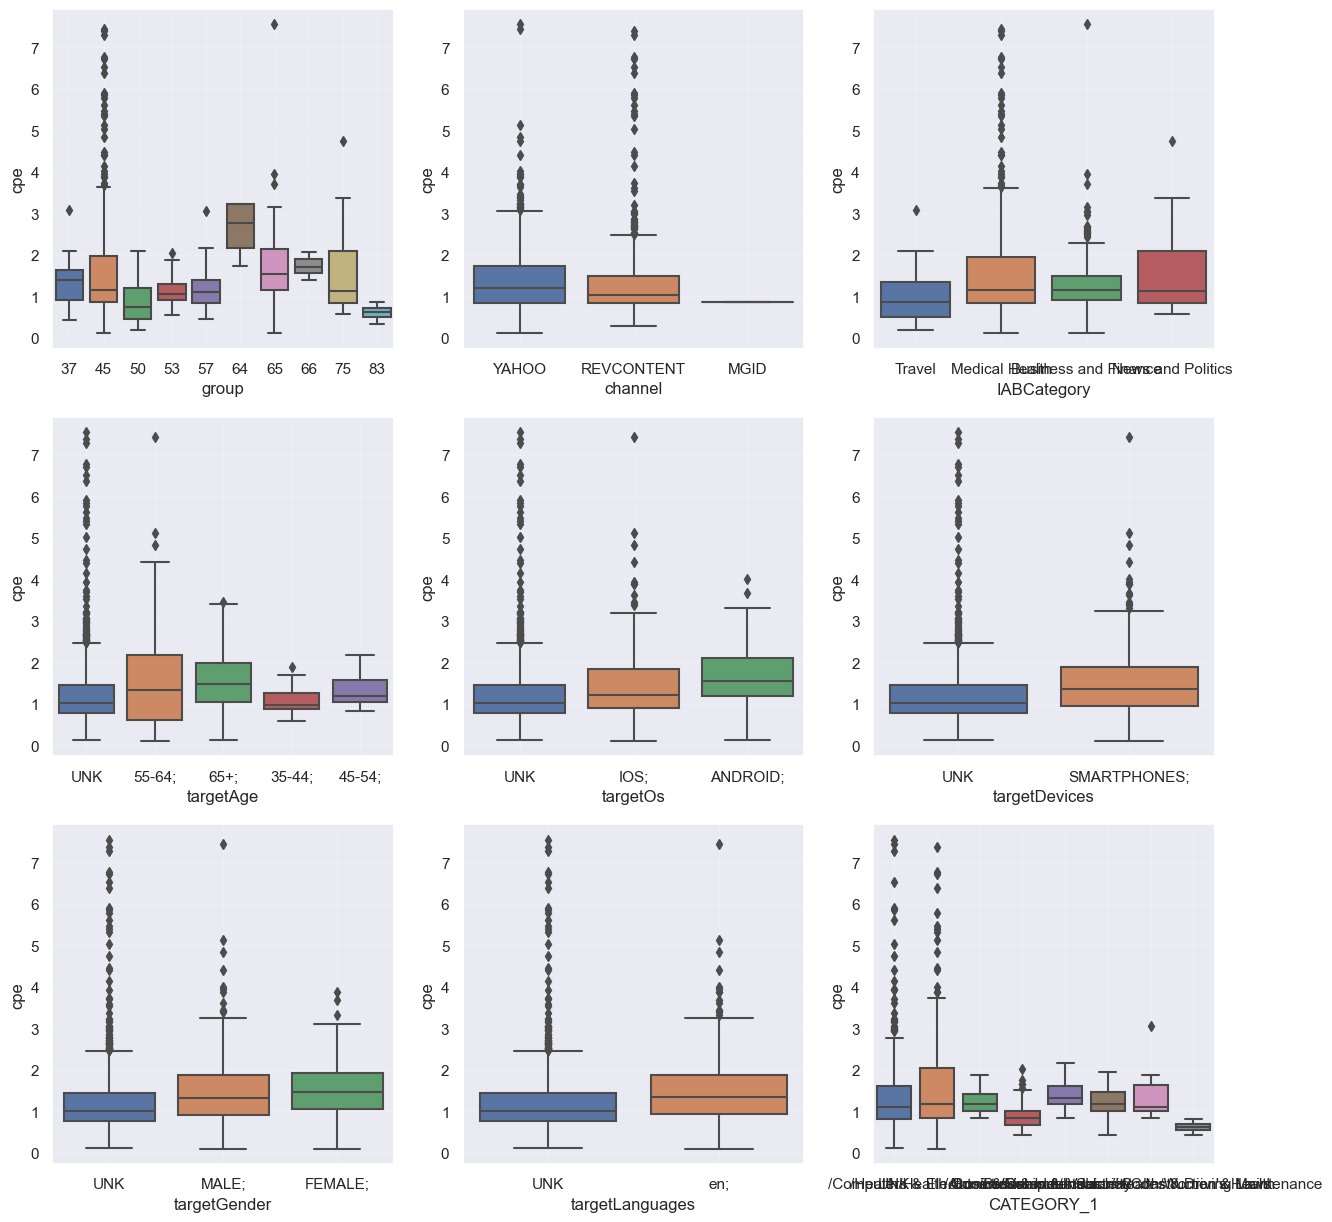

In [141]:
# Gather Data and Plot
target = 'cpe'
plt.figure(figsize=(15,15))
for i, var in enumerate(boxplot_vars):
    plt.subplot(3,3,i+1)
    sns_plot = sns.boxplot(data=df, x=var, y=target)
    plt.grid(which='major', alpha=0.2)
    fig = sns_plot.get_figure()
fig.savefig(f'images/boxplots/boxplot_{target}.png')

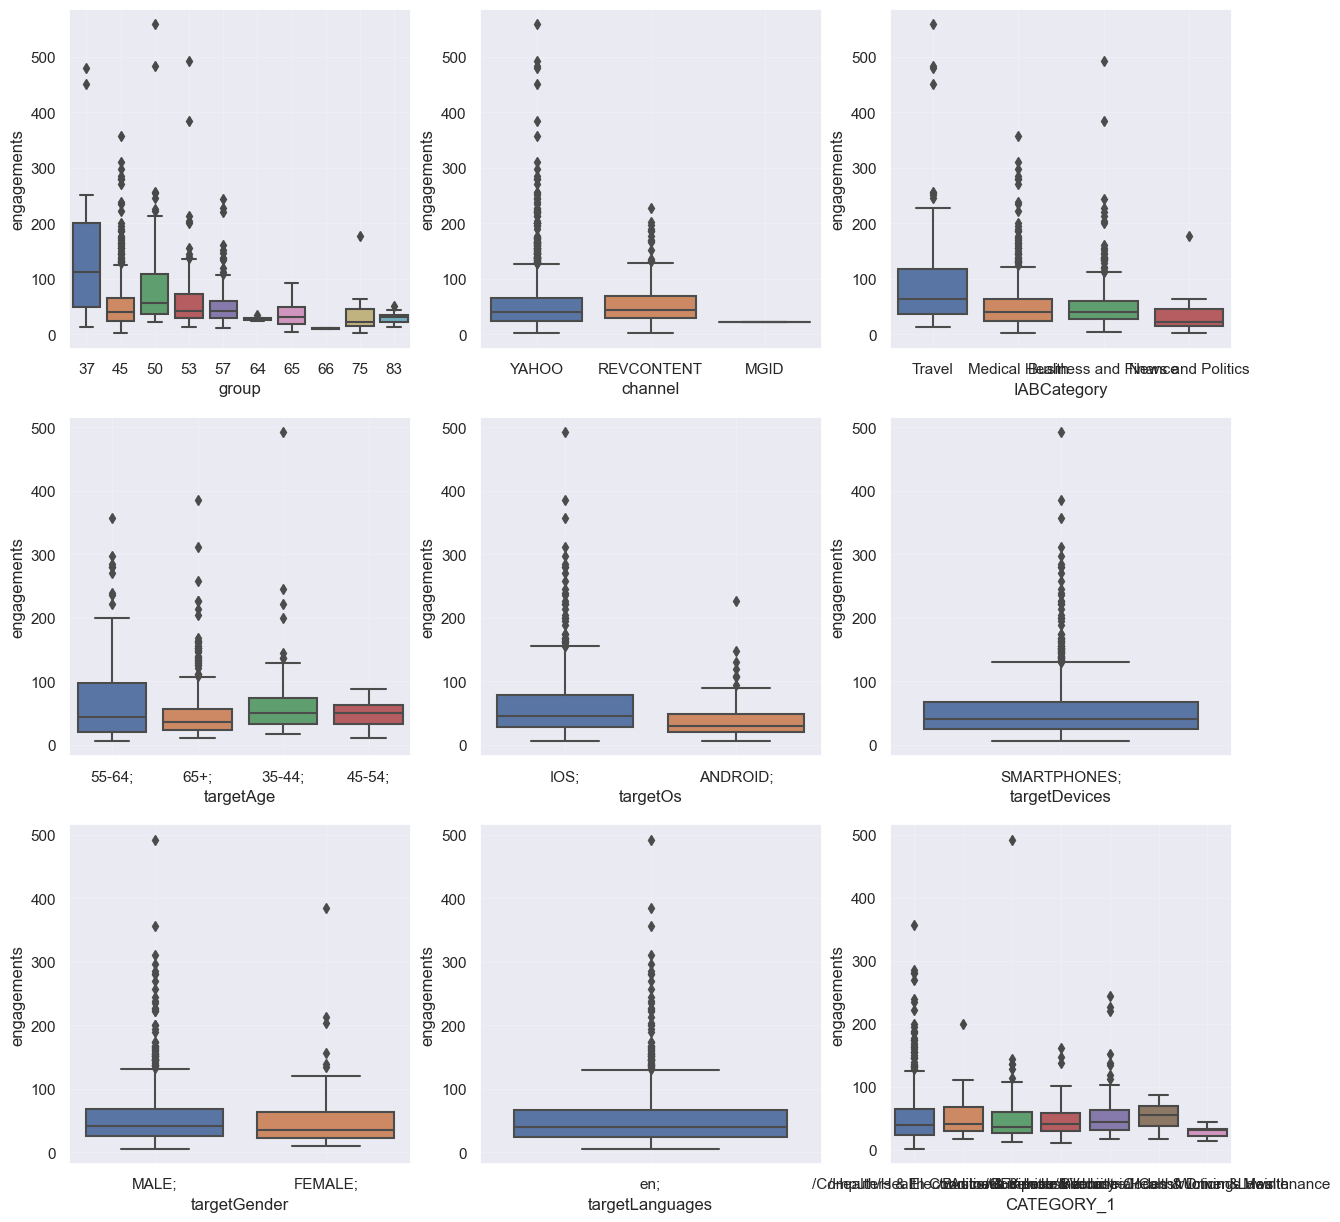

In [110]:
# Gather Data and Plot

target= 'engagements'
plt.figure(figsize=(15,15))
for i, var in enumerate(boxplot_vars):
    plt.subplot(3,3,i+1)
    sns_plot = sns.boxplot(data=df, x=var, y=target)
    plt.grid(which='major', alpha=0.2)
    fig = sns_plot.get_figure()
fig.savefig(f'images/boxplots/boxplot_{target}.png')


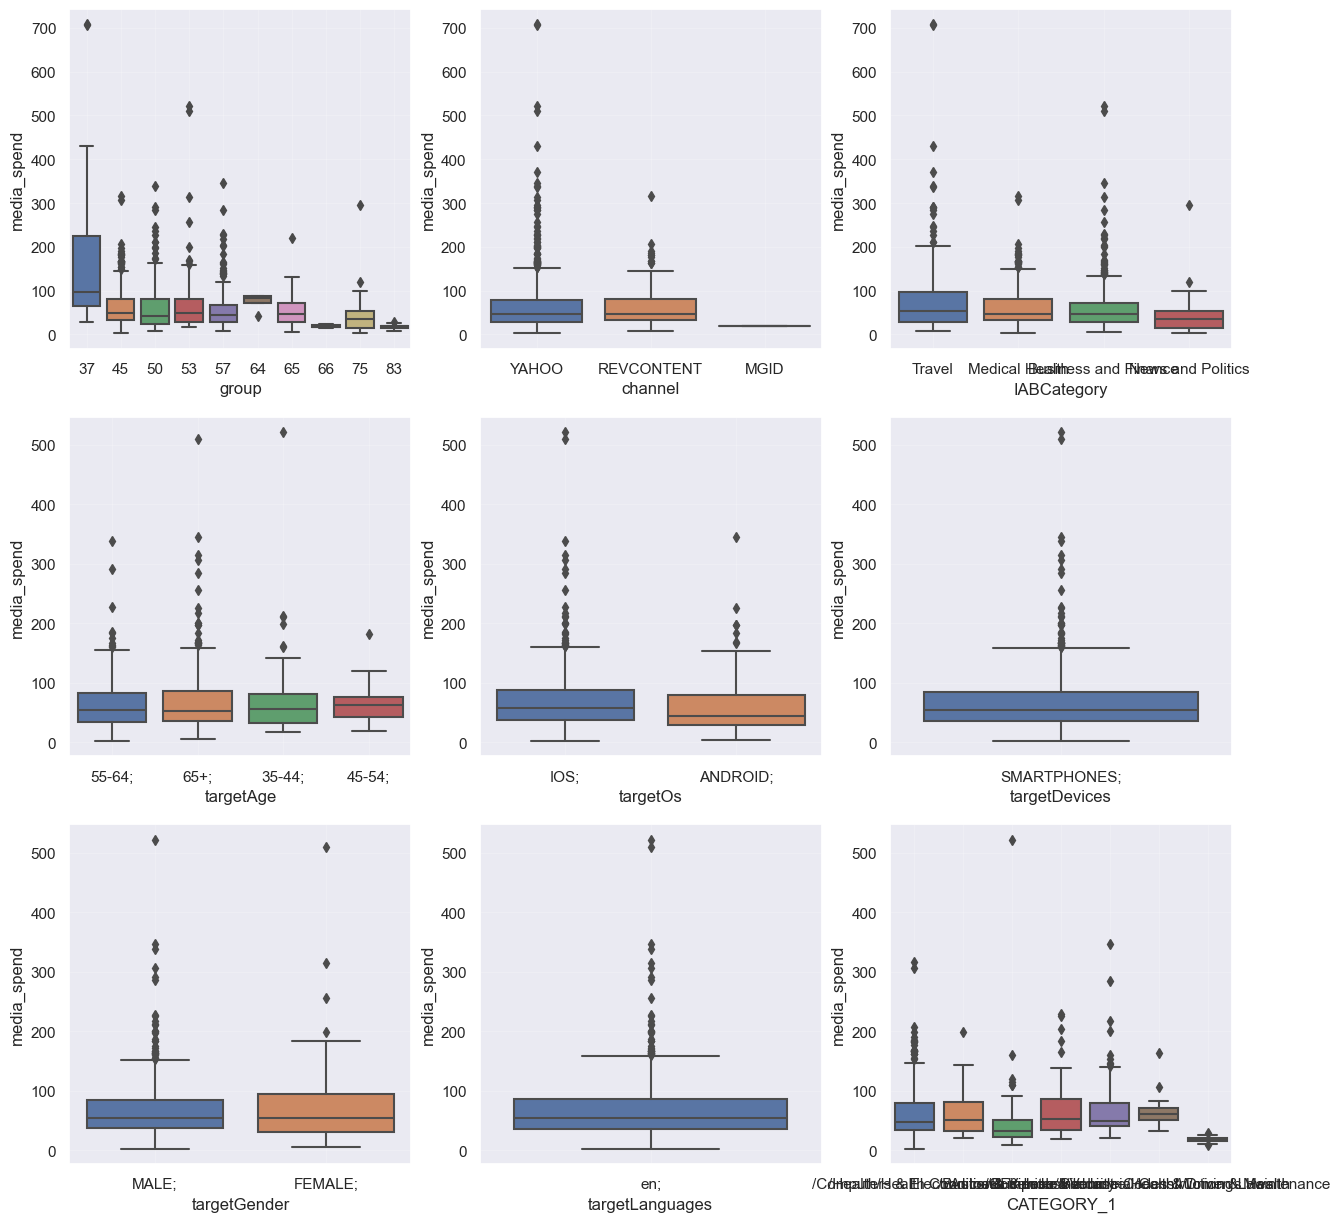

In [109]:
# Gather Data and Plot
target= 'media_spend'
plt.figure(figsize=(15,15))
for i, var in enumerate(boxplot_vars):
    plt.subplot(3,3,i+1)
    sns_plot = sns.boxplot(data=df, x=var, y=target)
    plt.grid(which='major', alpha=0.2)
    fig = sns_plot.get_figure()
fig.savefig(f'images/boxplots/boxplot_{target}.png')


### 2 - Encoding variables

In [171]:
list(unique_df[unique_df['unique']<=10]['var'])

['group',
 'channel',
 'IABCategory',
 'targetAge',
 'targetOs',
 'targetDevices',
 'targetGender',
 'targetLanguages',
 'CATEGORY_1']

In [142]:
categorical_columns = df[list(unique_df[unique_df['unique']<=10]['var'])].select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

### 2 - Pearson correlation

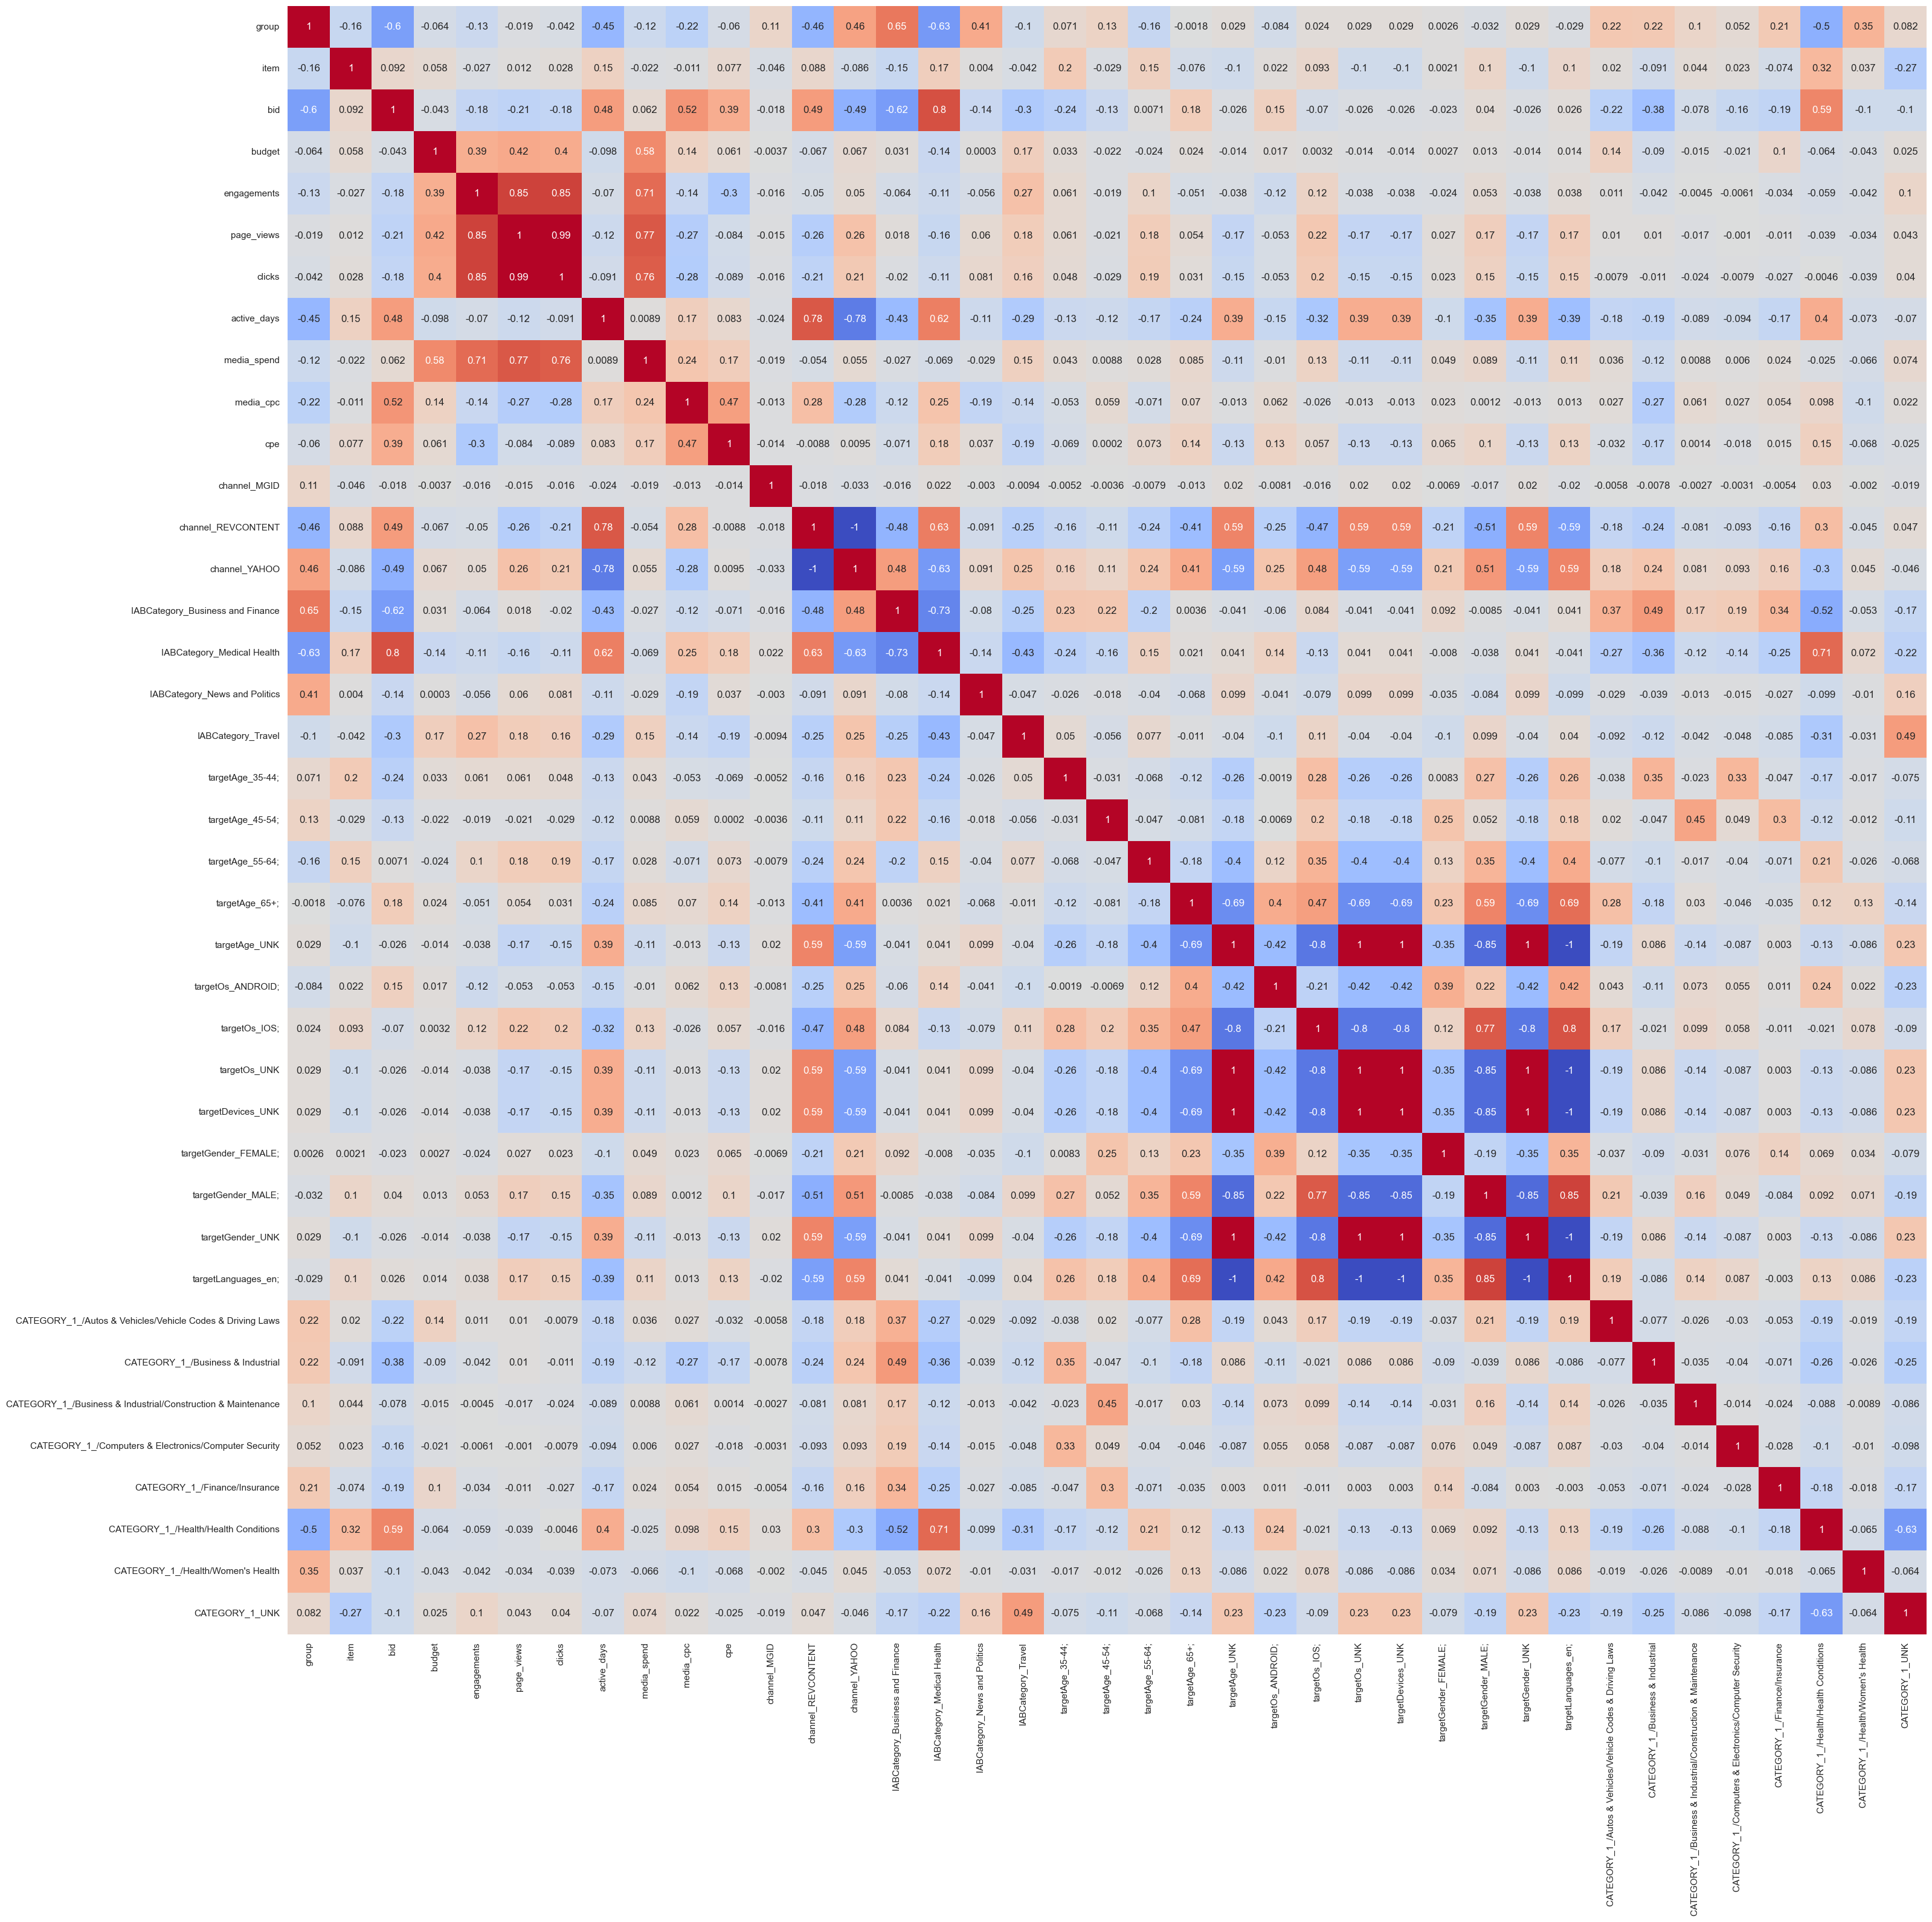

In [144]:

# Matriz de correlação
corr_matrix = df_encoded.select_dtypes('number').corr()
plt.figure(figsize=(35, 35))
sns.set(font_scale=1)
sns.heatmap(round(corr_matrix, 4), annot=True, cmap='coolwarm', cbar=False)
plt.show()

In [149]:
# most correlated variables with cpe
abs(corr_matrix['cpe']).sort_values(ascending=False)[:20]

cpe                                     1.000000
media_cpc                               0.471283
bid                                     0.393056
engagements                             0.303374
IABCategory_Travel                      0.185774
IABCategory_Medical Health              0.181353
media_spend                             0.172618
CATEGORY_1_/Business & Industrial       0.170998
CATEGORY_1_/Health/Health Conditions    0.150662
targetAge_65+;                          0.135172
targetGender_UNK                        0.132305
targetDevices_UNK                       0.132305
targetOs_UNK                            0.132305
targetAge_UNK                           0.132305
targetLanguages_en;                     0.132305
targetOs_ANDROID;                       0.129359
targetGender_MALE;                      0.102530
clicks                                  0.089252
page_views                              0.084076
active_days                             0.083004
Name: cpe, dtype: fl

In [151]:
# most correlated variables with engagements
abs(corr_matrix['engagements']).sort_values(ascending=False)[:20]

engagements                             1.000000
clicks                                  0.854380
page_views                              0.852871
media_spend                             0.710924
budget                                  0.387971
cpe                                     0.303374
IABCategory_Travel                      0.273434
bid                                     0.175969
media_cpc                               0.144768
group                                   0.128774
targetOs_IOS;                           0.117274
targetOs_ANDROID;                       0.115861
IABCategory_Medical Health              0.111899
targetAge_55-64;                        0.103725
CATEGORY_1_UNK                          0.103597
active_days                             0.069917
IABCategory_Business and Finance        0.064079
targetAge_35-44;                        0.061375
CATEGORY_1_/Health/Health Conditions    0.058601
IABCategory_News and Politics           0.056285
Name: engagements, d

In [152]:
# most correlated variables with media_spend
abs(corr_matrix['media_spend']).sort_values(ascending=False)[:20]

media_spend                          1.000000
page_views                           0.773575
clicks                               0.758542
engagements                          0.710924
budget                               0.576768
media_cpc                            0.237546
cpe                                  0.172618
IABCategory_Travel                   0.149889
targetOs_IOS;                        0.125916
group                                0.122693
CATEGORY_1_/Business & Industrial    0.115839
targetLanguages_en;                  0.110973
targetGender_UNK                     0.110973
targetDevices_UNK                    0.110973
targetOs_UNK                         0.110973
targetAge_UNK                        0.110973
targetGender_MALE;                   0.088773
targetAge_65+;                       0.085104
CATEGORY_1_UNK                       0.074028
IABCategory_Medical Health           0.069240
Name: media_spend, dtype: float64

In [150]:
# identificando correlações maiores do que 80%

for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if (i!=j) and (corr_matrix[i][j]>0.8):
            print(i, j, ' ', corr_matrix[i][j])


bid IABCategory_Medical Health   0.8047402422619141
engagements page_views   0.8528711555311983
engagements clicks   0.8543796120987199
page_views engagements   0.8528711555311983
page_views clicks   0.9940505833120528
clicks engagements   0.8543796120987199
clicks page_views   0.9940505833120528
IABCategory_Medical Health bid   0.8047402422619141
targetAge_UNK targetOs_UNK   1.0
targetAge_UNK targetDevices_UNK   1.0
targetAge_UNK targetGender_UNK   1.0
targetOs_UNK targetAge_UNK   1.0
targetOs_UNK targetDevices_UNK   1.0
targetOs_UNK targetGender_UNK   1.0
targetDevices_UNK targetAge_UNK   1.0
targetDevices_UNK targetOs_UNK   1.0
targetDevices_UNK targetGender_UNK   1.0
targetGender_MALE; targetLanguages_en;   0.8519855196786248
targetGender_UNK targetAge_UNK   1.0
targetGender_UNK targetOs_UNK   1.0
targetGender_UNK targetDevices_UNK   1.0
targetLanguages_en; targetGender_MALE;   0.8519855196786248


### 3 - Correlações Spearman

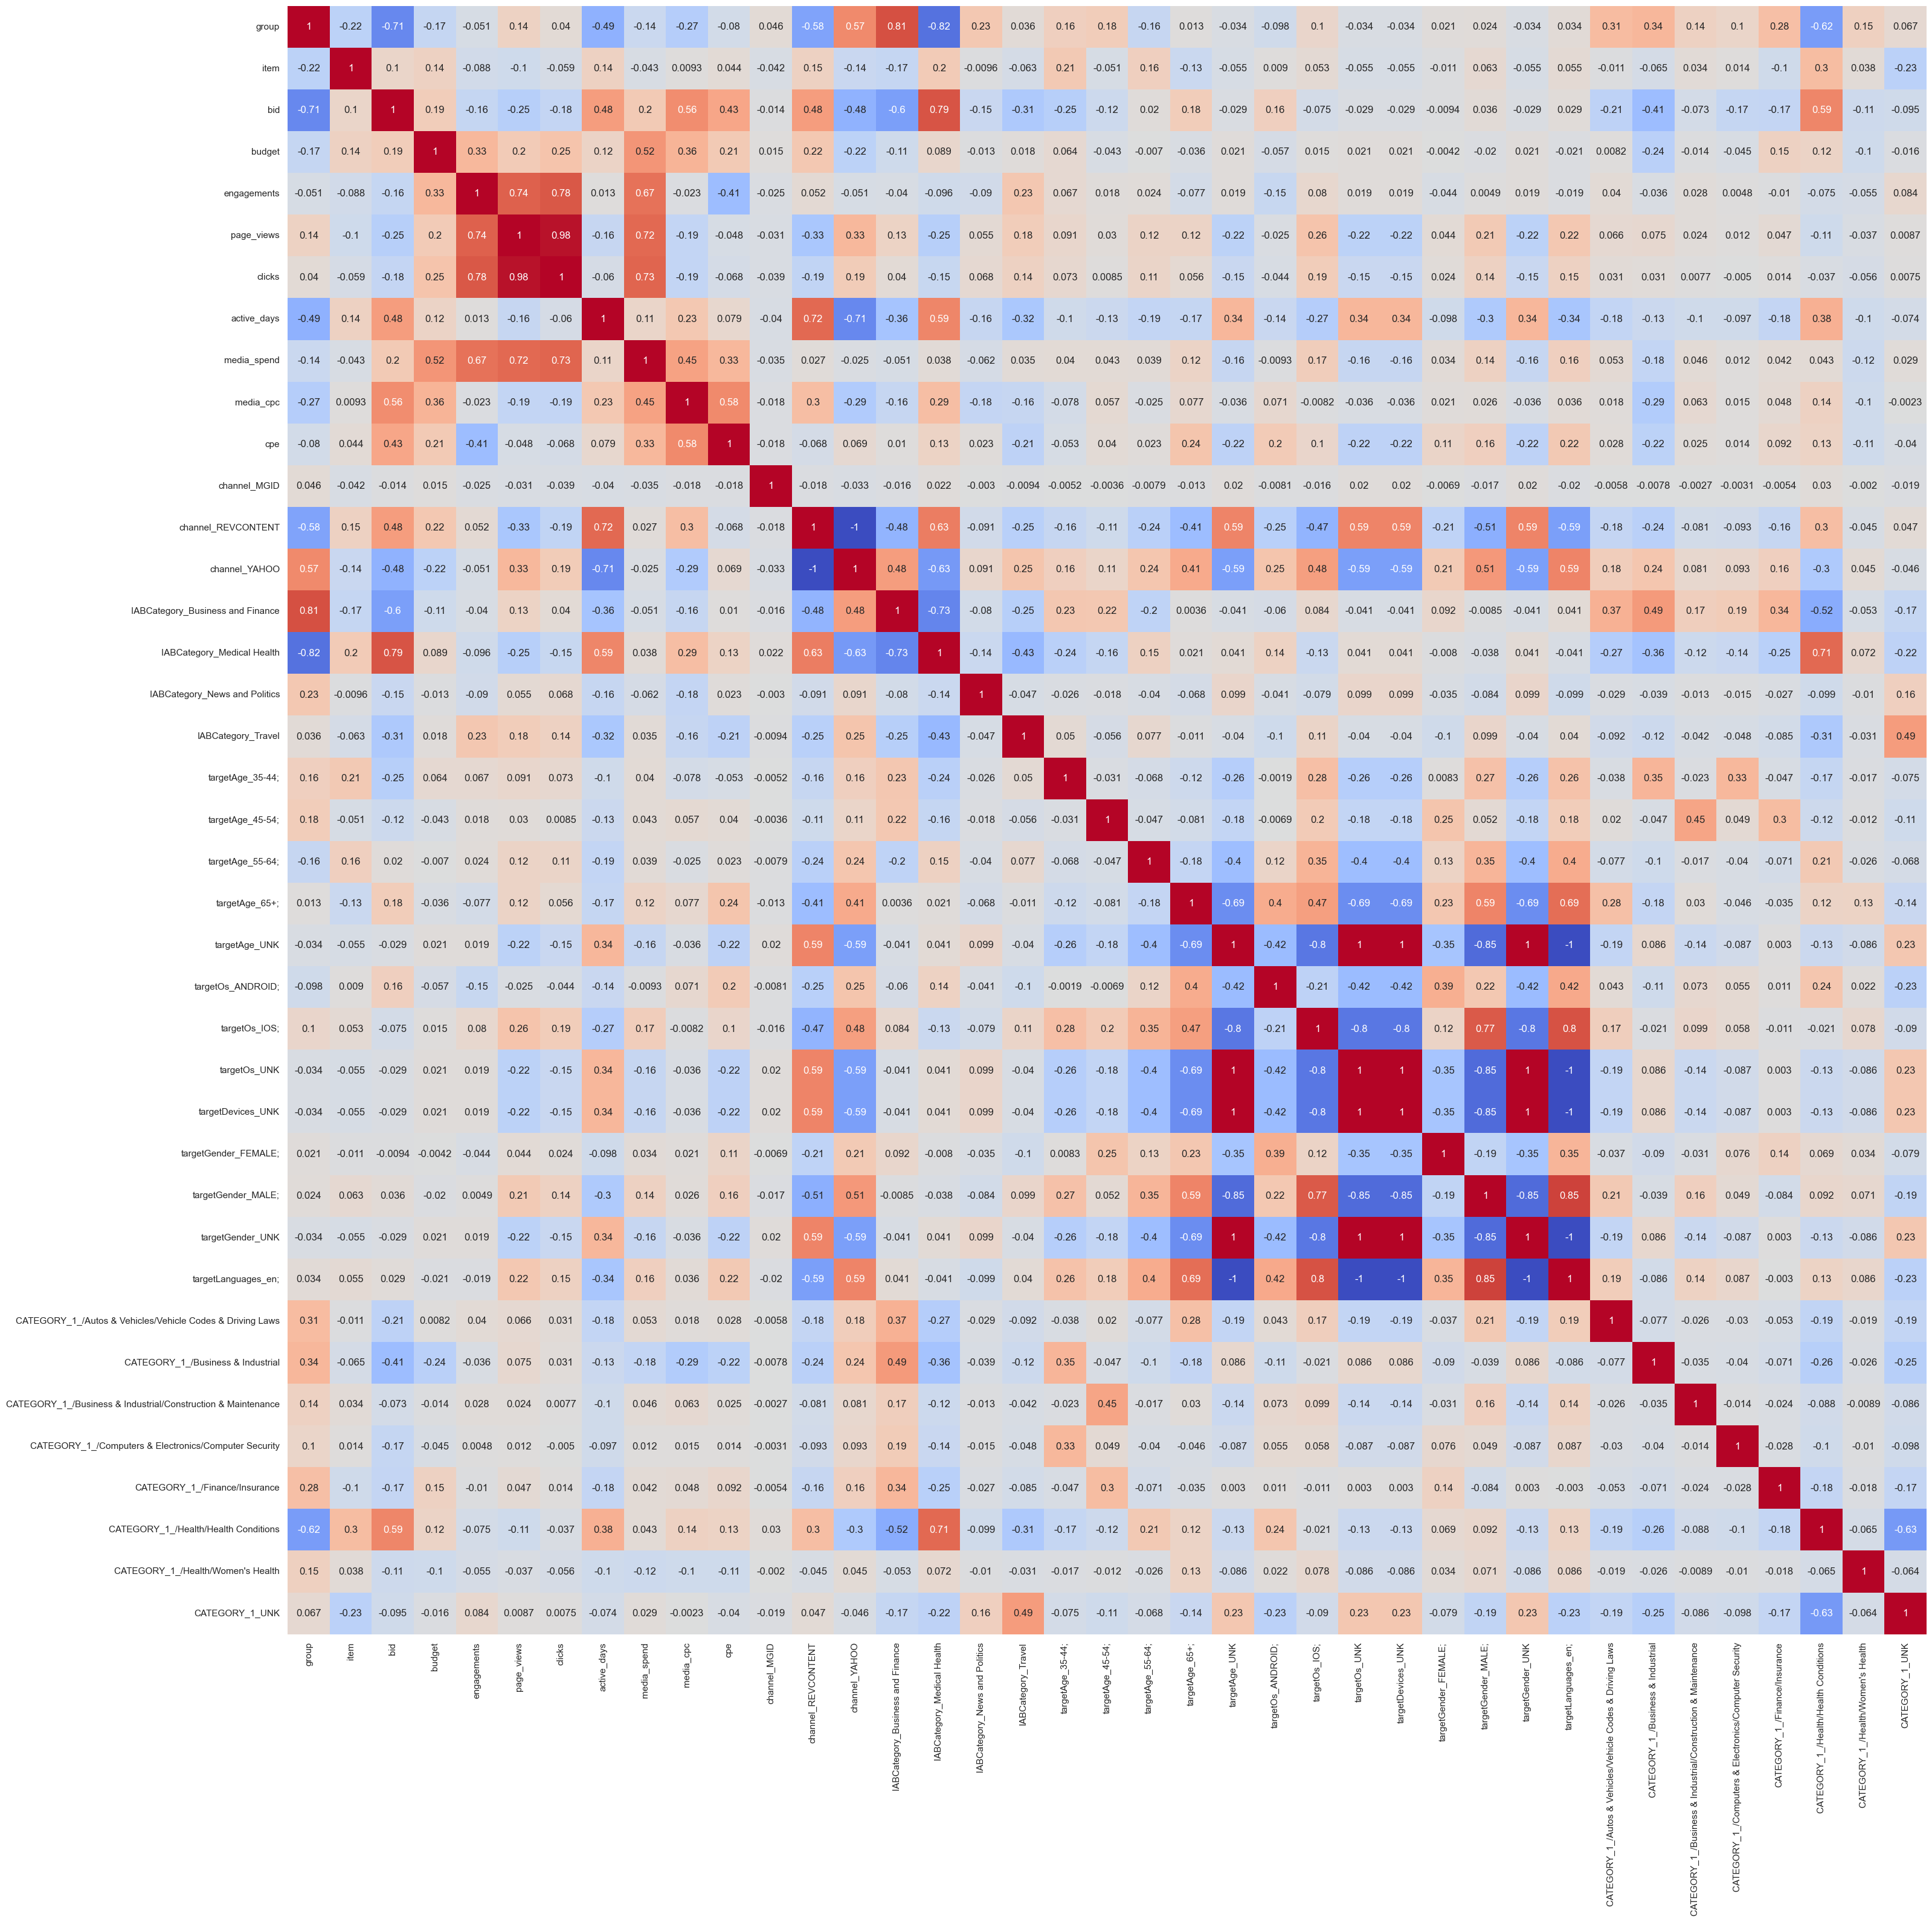

In [166]:
# Matriz de correlação spearman 

corr_matrix = df_encoded.select_dtypes('number').corr('spearman')
plt.figure(figsize=(35, 35))
sns.set(font_scale=1)
sns.heatmap(round(corr_matrix, 4), annot=True, cmap='coolwarm', cbar=False)
plt.show()

In [167]:
# most correlated variables with cpe
abs(corr_matrix['cpe']).sort_values(ascending=False)[:20]

cpe                                     1.000000
media_cpc                               0.577803
bid                                     0.431853
engagements                             0.414038
media_spend                             0.334836
targetAge_65+;                          0.244565
CATEGORY_1_/Business & Industrial       0.219460
targetGender_UNK                        0.215640
targetDevices_UNK                       0.215640
targetOs_UNK                            0.215640
targetAge_UNK                           0.215640
targetLanguages_en;                     0.215640
IABCategory_Travel                      0.214915
budget                                  0.210640
targetOs_ANDROID;                       0.197850
targetGender_MALE;                      0.162358
IABCategory_Medical Health              0.130064
CATEGORY_1_/Health/Health Conditions    0.126732
targetGender_FEMALE;                    0.113779
CATEGORY_1_/Health/Women's Health       0.105584
Name: cpe, dtype: fl

In [168]:
# most correlated variables with engagements
abs(corr_matrix['engagements']).sort_values(ascending=False)[:20]

engagements                             1.000000
clicks                                  0.775267
page_views                              0.744305
media_spend                             0.672466
cpe                                     0.414038
budget                                  0.329232
IABCategory_Travel                      0.229489
bid                                     0.164811
targetOs_ANDROID;                       0.151728
IABCategory_Medical Health              0.095971
IABCategory_News and Politics           0.090137
item                                    0.087730
CATEGORY_1_UNK                          0.084153
targetOs_IOS;                           0.079943
targetAge_65+;                          0.076704
CATEGORY_1_/Health/Health Conditions    0.074691
targetAge_35-44;                        0.067165
CATEGORY_1_/Health/Women's Health       0.054889
channel_REVCONTENT                      0.051996
group                                   0.050813
Name: engagements, d

In [169]:
# most correlated variables with media_spend
abs(corr_matrix['media_spend']).sort_values(ascending=False)[:20]

media_spend                          1.000000
clicks                               0.732745
page_views                           0.718390
engagements                          0.672466
budget                               0.520561
media_cpc                            0.454686
cpe                                  0.334836
bid                                  0.204100
CATEGORY_1_/Business & Industrial    0.182655
targetOs_IOS;                        0.174486
targetOs_UNK                         0.156757
targetLanguages_en;                  0.156757
targetAge_UNK                        0.156757
targetDevices_UNK                    0.156757
targetGender_UNK                     0.156757
targetGender_MALE;                   0.145028
group                                0.136315
targetAge_65+;                       0.120617
CATEGORY_1_/Health/Women's Health    0.117524
active_days                          0.105952
Name: media_spend, dtype: float64